# EDA - Sale Prediction

the objective of this notebook is to understand the sales data using EDA and visualization

In [1]:
#Import Libraries used for data analysis and visualizion
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logging

import dvc.api
import io 


sns.set_style("darkgrid")
%matplotlib inline

In [7]:
import sys
 
# adding scripts folder to the system path
sys.path.insert(0, '../scripts/')

In [3]:
import DataPipeline as dp

In [4]:
train_path="data/train_data.csv"
test_path="data/test_data.csv"

repo="C:/Users/user/Desktop/TenAcademy/Sales-Prediction-For-Pharmaceutical/"
train_ver="v1-train"
test_ver="v1-test"

train_str= dvc.api.read(
    path=train_path,
    repo=repo,
    rev=train_ver,
)

test_str= dvc.api.read(
    path=test_path,
    repo=repo,
    rev=test_ver,
)

   
train_data = pd.read_csv(io.StringIO(train_str), sep=",")
test_data = pd.read_csv(io.StringIO(test_str), sep=",")
print(train_data.columns)
print(test_data.columns)

Index(['Unnamed: 0', 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers',
       'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
Index(['Unnamed: 0', 'Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [5]:
train_data.drop(columns=['Unnamed: 0'], inplace=True)
test_data.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
print ("Rows                : " ,train_data.shape[0])
print ("Columns             : " ,train_data.shape[1])
print ("\nFeatures          : \n" ,train_data.columns.tolist())
print ("\nMissing values    :  ", train_data.isnull().any())

Rows                :  1017209
Columns             :  18

Features          : 
 ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

Missing values    :   Store                        False
DayOfWeek                    False
Date                         False
Sales                        False
Customers                    False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval              

In [9]:

print ("\nUnique values     : \n",train_data.nunique())


Unique values     : 
 Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 25
Promo2SinceYear                  8
PromoInterval                    4
dtype: int64


In [10]:
train_data.query('Store == 1')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,1,6,2013-01-05,4997,635,1,0,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
938,1,5,2013-01-04,4486,619,1,0,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
939,1,4,2013-01-03,4327,578,1,0,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
940,1,3,2013-01-02,5530,668,1,0,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [11]:
# Unique values
columns = list(train_data.columns)
columns.remove('Date')
columns.remove('CompetitionDistance')
for i in columns:
    print('Unique values in %s : %s' % (i, train_data[i].unique()))

Unique values in Store : [   1    2    3 ... 1113 1114 1115]
Unique values in DayOfWeek : [5 4 3 2 1 7 6]
Unique values in Sales : [ 5263  5020  4782 ... 20362 18841 21237]
Unique values in Customers : [ 555  546  523 ... 3727 4022 4106]
Unique values in Open : [1 0]
Unique values in Promo : [1 0]
Unique values in StateHoliday : ['0' 'a' 'b' 'c']
Unique values in SchoolHoliday : [1 0]
Unique values in StoreType : ['c' 'a' 'd' 'b']
Unique values in Assortment : ['a' 'c' 'b']
Unique values in CompetitionOpenSinceMonth : [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values in CompetitionOpenSinceYear : [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values in Promo2 : [0 1]
Unique values in Promo2SinceWeek : [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values in Promo2SinceYear : [   0. 2010. 2011. 2012. 2009. 2014.

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

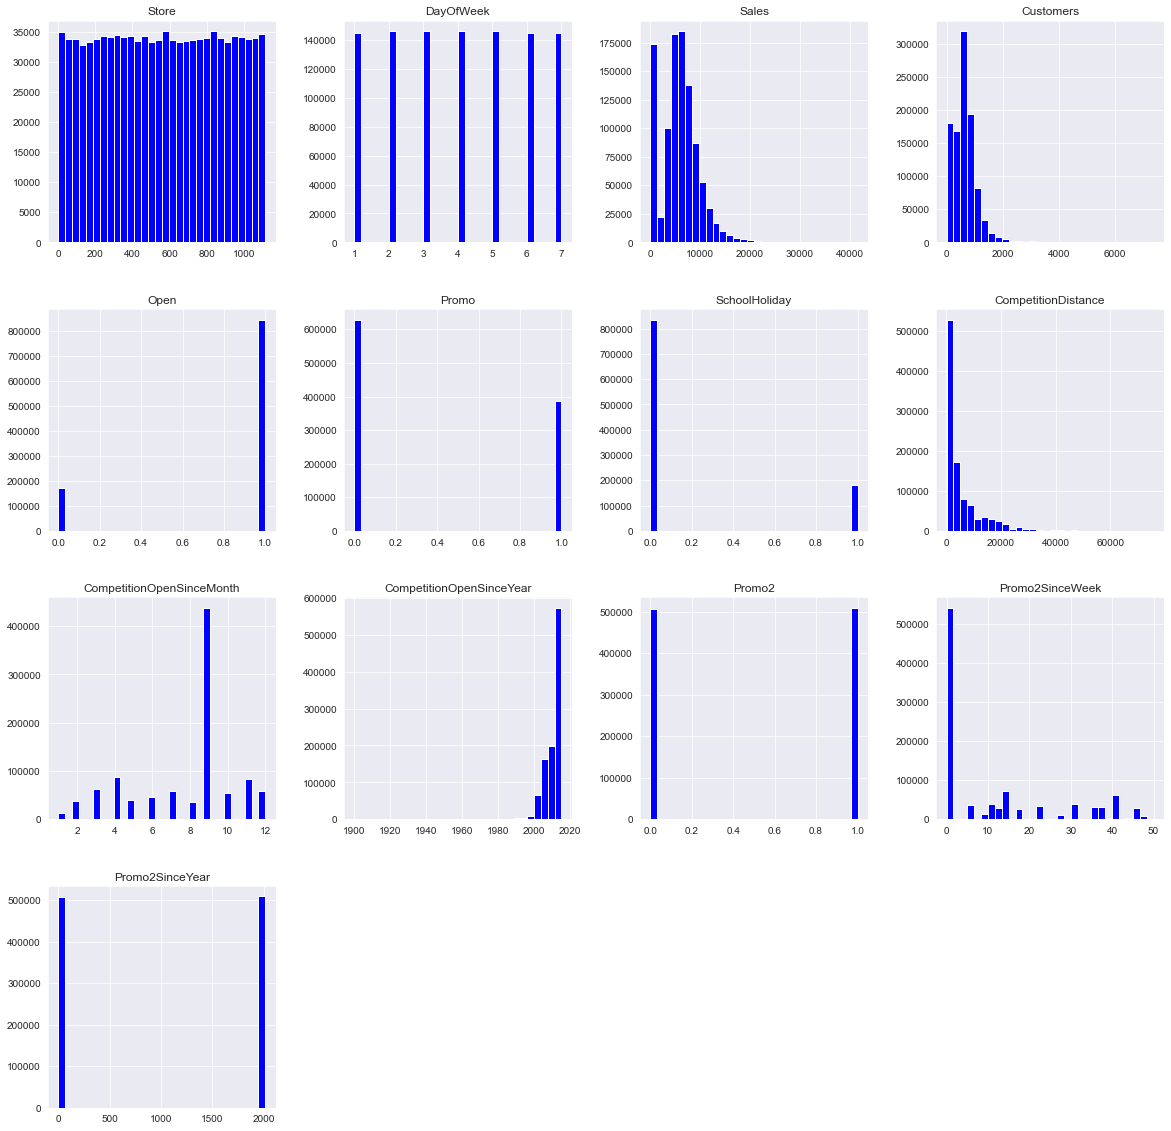

In [12]:
train_data.hist(bins = 30, figsize=(20, 20), color = 'b')

#### Data Pipline

In [19]:
pipe = dp.DataPipeline()

In [20]:
clean_train = pipe.pipeline(train_data)

In [21]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int32  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int32  
 10  Assortment                 1017209 non-null  int32  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [22]:
clean_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,QuadYear,DayOfYear,year,month
0,1,5,2015-07-31,5263,555,1,1,0,1,3,...,0.0,0.0,0,2015,7,31,3,212,2015,7
1,1,4,2015-07-30,5020,546,1,1,0,1,3,...,0.0,0.0,0,2015,7,30,3,211,2015,7
2,1,3,2015-07-29,4782,523,1,1,0,1,3,...,0.0,0.0,0,2015,7,29,3,210,2015,7
3,1,2,2015-07-28,5011,560,1,1,0,1,3,...,0.0,0.0,0,2015,7,28,3,209,2015,7
4,1,1,2015-07-27,6102,612,1,1,0,1,3,...,0.0,0.0,0,2015,7,27,3,208,2015,7


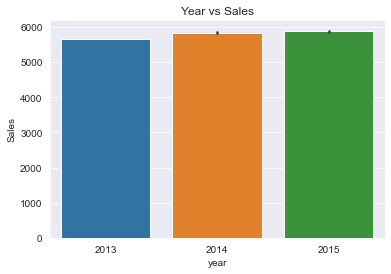

In [23]:
# Sales with respect to year 
sns.barplot(x='year', y='Sales', data=clean_train).set(title='Year vs Sales')

plt.show()

#### - Observation
- the sale is increasing from year to year

[Text(0.5, 1.0, 'Month vs Sales')]

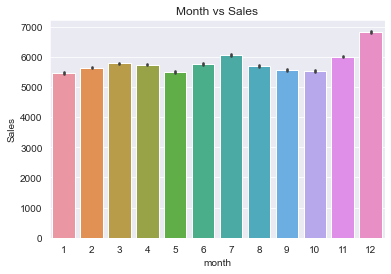

In [25]:
sns.barplot(x='month',y='Sales', data=clean_train).set(title='Month vs Sales')

#### - Observation
- there are more number of sells in the end of a year (December)

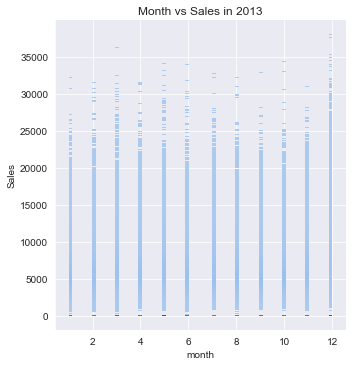

In [30]:
sns.displot(x='month',y='Sales', data=clean_train.query('year == 2013')).set(title='Month vs Sales in 2013')

In [ ]:

sns.barplot(x='month',y='Sales', data=clean_train.query('year == 2014')).set(title='Month vs Sales')
sns.barplot(x='month',y='Sales', data=clean_train.query('year == 2015')).set(title='Month vs Sales')

In [11]:
print ("Rows                : " ,test_data.shape[0])
print ("Columns             : " ,test_data.shape[1])
print ("\nFeatures          : \n" ,test_data.columns.tolist())
print ("\nMissing values    :  ", test_data.isnull().any())

Rows                :  41088
Columns             :  17

Features          : 
 ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

Missing values    :   Id                           False
Store                        False
DayOfWeek                    False
Date                         False
Open                          True
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
dtype: bool


- open has a missing values so we can fill it with mode

In [ ]:
test_data.loc[np.isnan(test['Open']), 'Open'] = mode(test_data['Open'])